In [ ]:
# Image Recognition - Animals vs. Transport 

### Description: Convolutional Neural Network that classifies images 


### Model Type: CNN with Tensor Flow 


### Version - V1.0

### Goal: To classify images in categories 


### Version Updates:
# - Image tester file 


### Future implementations:
# - Add new categories
# - Add explanations  


### Author - Luiz Gabriel Bongiolo

### References 
#  -Sentex Youtube Channel https://www.youtube.com/watch?v=j-3vuBynnOE&t=5s
#  -https://keras.io/api/layers/convolution_layers/convolution2d/
#  -Computer Science Youtube Channel https://www.youtube.com/watch?v=iGWbqhdjf2s

In [2]:
import tensorflow as tf
from tensorflow.python import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.python.keras import layers 
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt 

plt.style.use("fivethirtyeight")

#Remove warnings 
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")


In [3]:
#Load the data
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



170498071/170498071 [==============================] - 7s 0us/step


In [4]:
#Look at the data 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [5]:
#Get the shape of the arrays 
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [6]:
#Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

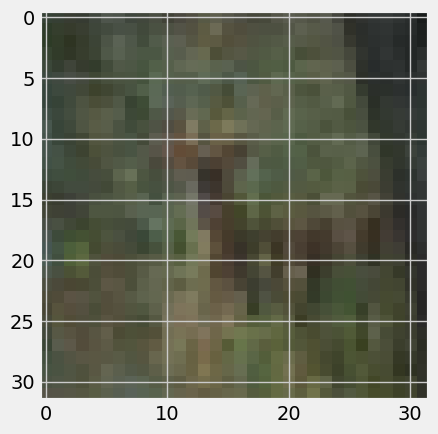

In [7]:
#Show the image as a picture 
img = plt.imshow(x_train[index])

In [8]:
#Get the image label 
print("The image label is:", y_train[index])

The image label is: [4]


In [9]:
#Get the image classification 
classification = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
#Print the image class
print("The image class is: ", classification[y_train[index][0]])

The image class is:  deer


In [10]:
#Convert the labels into a set of 10 numbers to imput into the neural network 
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [11]:
#Print the new labels 
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [12]:
#Print the new label of the image/pricure above 
print("The one hot label is: ", y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
#Normalize the pixels to be values between 0 and 1 

x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [15]:
model = Sequential()

#Add the first layer 
model.add( Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)))

#Add a pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))

#Add another convolution layer 
model.add( Conv2D(32, (5,5), activation="relu"))

#Add another pooling layer 
model.add(MaxPooling2D(pool_size = (2,2)))

#Add a flattening layer 
model.add(Flatten())

#Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

#Add a drop out layer 
model.add(Dropout(0.5))

#Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

#Add a drop out layer 
model.add(Dropout(0.5))

#Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

#Add a layer with 10 neurons
model.add(Dense(10, activation="softmax"))




2023-02-18 08:20:09.307732: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-18 08:20:09.307766: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-18 08:20:09.307791: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (user): /proc/driver/nvidia/version does not exist


In [16]:
#Compile the model
model.compile(loss = "categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
#Train the model 
hist = model.fit(x_train, y_train_one_hot, batch_size = 256, epochs = 10, validation_split = 0.2)

Epoch 1/10


2023-02-18 08:20:36.833345: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


157/157 [==============================] - 61s 382ms/step - loss: 1.7774 - accuracy: 0.3345 - val_loss: 1.4794 - val_accuracy: 0.4541
Epoch 2/10
157/157 [==============================] - 76s 486ms/step - loss: 1.4370 - accuracy: 0.4735 - val_loss: 1.3500 - val_accuracy: 0.5037
Epoch 3/10
157/157 [==============================] - 89s 570ms/step - loss: 1.2851 - accuracy: 0.5388 - val_loss: 1.2067 - val_accuracy: 0.5664
Epoch 4/10
157/157 [==============================] - 92s 585ms/step - loss: 1.1777 - accuracy: 0.5786 - val_loss: 1.1240 - val_accuracy: 0.6009
Epoch 5/10
157/157 [==============================] - 91s 583ms/step - loss: 1.0886 - accuracy: 0.6130 - val_loss: 1.0705 - val_accuracy: 0.6239
Epoch 6/10
157/157 [==============================] - 157s 1s/step - loss: 1.0313 - accuracy: 0.6362 - val_loss: 1.0205 - val_accuracy: 0.6425
Epoch 7/10
157/157 [==============================] - 90s 568ms/step - loss: 0.9623 - accuracy: 0.6628 - val_loss: 1.0096 - val_accuracy: 0.649

In [18]:
#Evaluate the model using the test data set 
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: 0.9799 - accuracy: 0.6635


0.6635000109672546

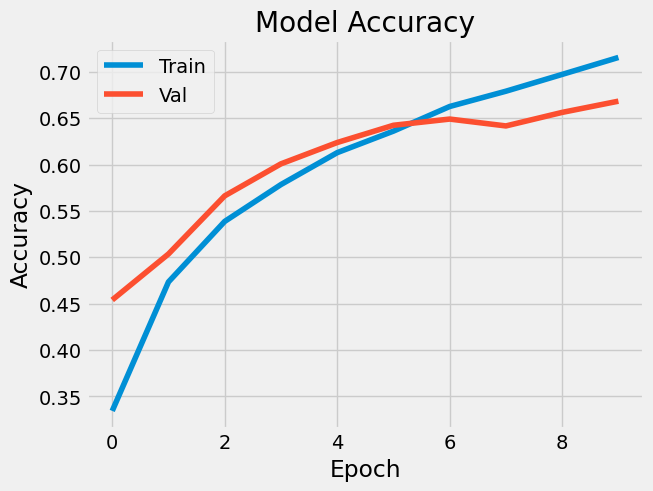

In [19]:
#Visualize the models accuracy 
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")

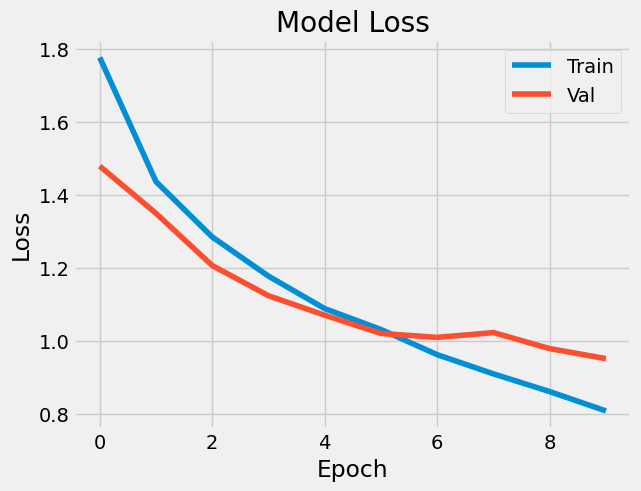

In [20]:
#Visualize the models loss
#Visualize the models accuracy 
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper right")

In [21]:
#Test the model with an example 

uploaded = ".../Image Recognition - Animals vs Transport/frog.jpg"



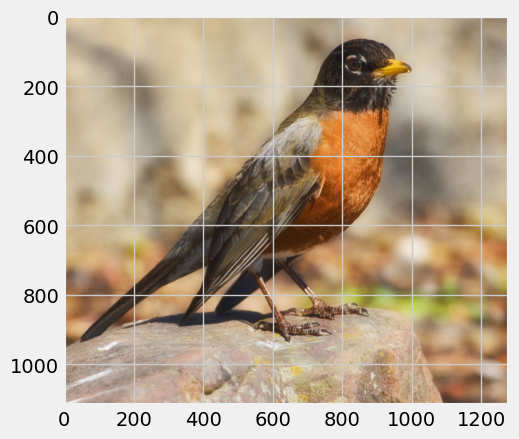

In [43]:
#Show the image
new_image = plt.imread("bird.jpg")
img = plt.imshow(new_image)

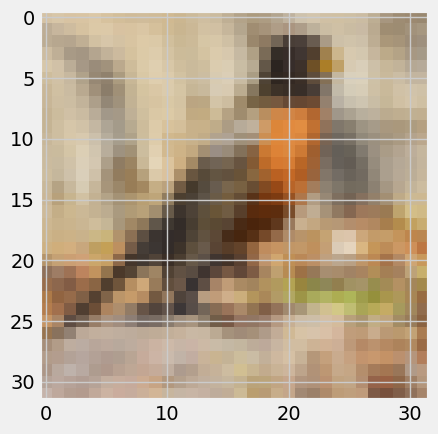

In [44]:
#Resize the image
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)



In [45]:
# Get the models predictions 
predictions = model.predict(np.array([resized_image]))

#Show the predictions 
predictions 


1/1 [==============================] - 0s 28ms/step


array([[4.8759482e-03, 1.6755823e-04, 8.7446916e-01, 2.7135149e-02,
        2.8049367e-02, 3.7161443e-02, 9.4447257e-03, 1.7942099e-02,
        3.7369560e-04, 3.8079507e-04]], dtype=float32)

In [46]:
#Sort the predictions from least to greatest 

list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions 

for i in range(10):
    for j in range(10):
        if x[0][list_index[1]] > x[0][list_index[j]]:
            temp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = temp

In [47]:
#Show the sorted labels in order
print(list_index)

#Will print the highest probability by order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [48]:
#Print predictions 
for i in range(10):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]] * 100, 2), "%")


airplane : 0.49 %
automobile : 0.02 %
bird : 87.45 %
cat : 2.71 %
deer : 2.8 %
dog : 3.72 %
frog : 0.94 %
horse : 1.79 %
ship : 0.04 %
truck : 0.04 %


In [49]:
#Save the model 
#import pickle

#file = "Animalvstransport.sav"
#pickle.dump(model, open(file, 'wb'))